# Lab | Imbalanced data


We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

## Instructions

1. Load the dataset and explore the variables.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('files_for_lab/customer_churn.csv')

In [67]:
display(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
data.shape

(7043, 21)

In [69]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [71]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [72]:
mapping = {'Yes': 1, 'No': 0}
data['Churn'] = data['Churn'].replace(mapping)

In [73]:
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [74]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

2. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [75]:
# Build X and y
y = data['Churn']
X = data[['tenure','SeniorCitizen','MonthlyCharges']]

In [76]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# split numericals and categoricals
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])

3. Build the logistic regression model.

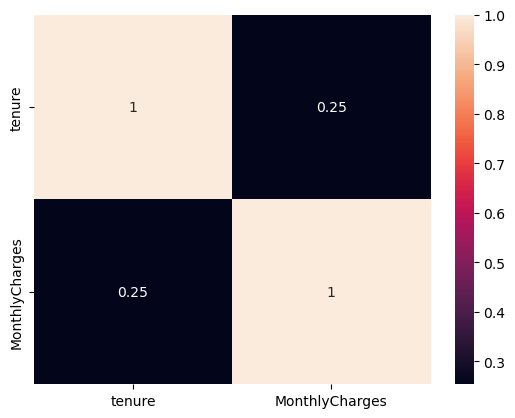

In [78]:
correlations_matrix = X_train_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

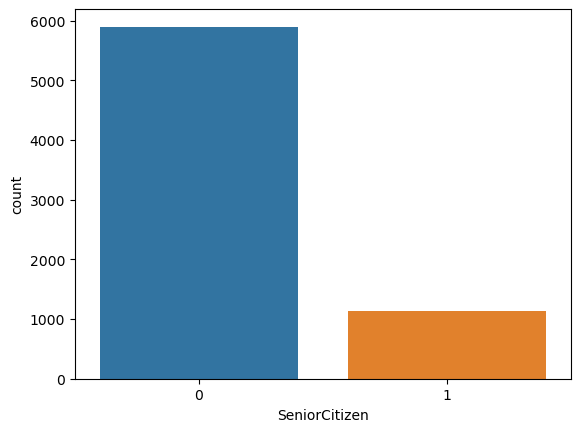

In [79]:
sns.countplot(x='SeniorCitizen', data=X);
plt.show()

In [80]:
# Check skewness ## no need to Powertransform

print(f"The skew of column {X_train_num.columns[0]} is {X_train_num[X_train_num.columns[0]].skew()}")
print(f"The skew of column {X_train_num.columns[1]} is {X_train_num[X_train_num.columns[1]].skew()}")

The skew of column tenure is 0.23994628255612013
The skew of column MonthlyCharges is -0.22624795699600828


In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_df, y_train)

LogisticRegression(random_state=0)

In [82]:
lr.predict(X_train_df)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
lr.predict_proba(X_train_df)

array([[0.71343373, 0.28656627],
       [0.84472061, 0.15527939],
       [0.75002106, 0.24997894],
       ...,
       [0.85266932, 0.14733068],
       [0.23306628, 0.76693372],
       [0.92717227, 0.07282773]])

In [84]:
logits = np.log(lr.predict_proba(X_train_df)[:,1]/(1-lr.predict_proba(X_train_df)[:,1]))

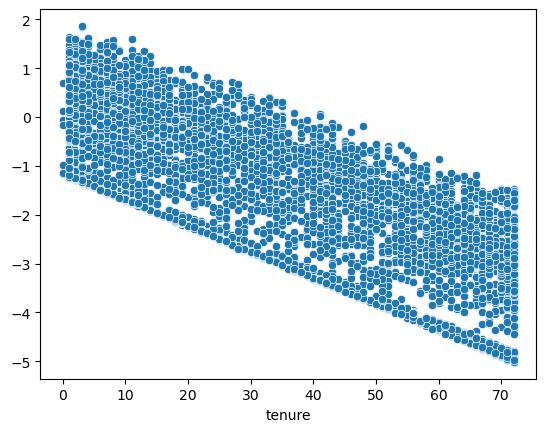

In [85]:
sns.scatterplot(y = logits,x = X_train_df['tenure']);
plt.show()

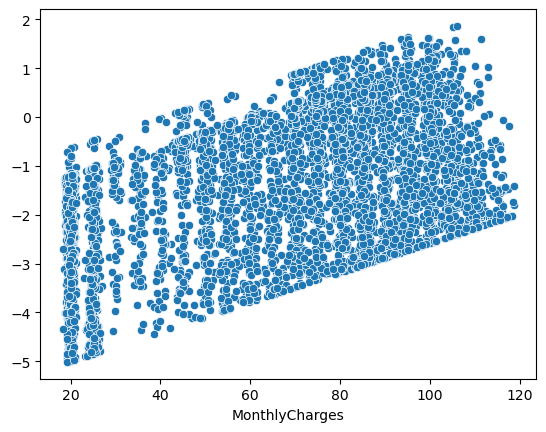

In [86]:
sns.scatterplot(y = logits,x = X_train_df['MonthlyCharges']);
plt.show()

5. Evaluate the model.


In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_df, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_df, y_test)))

The accuracy of the model in the TEST set is: 0.81


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_df)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.69
The recall in the TEST set is: 0.48
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.45


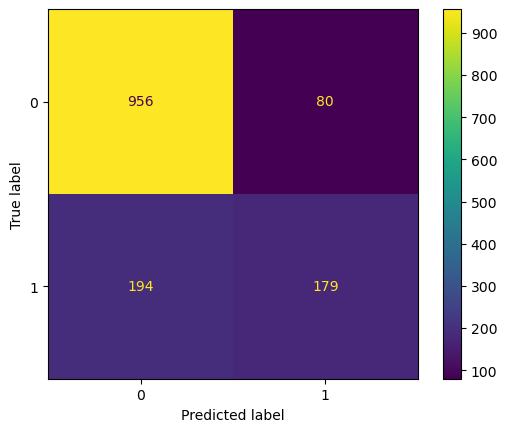

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

6. Even a simple model will give us more than 70% accuracy. Why?

Accuracy is (True Postive + True Negative) / Total Cases --> this are the values in the diagonal. Since the TN is so high, compared to the others, then the accuracy will be high.
TN are the customers that didnt churn and the model predicted that werent going to churn.
 

?? Because as it is unbalanced, the weight of the SeniorCitizen = 0, makes the prediction more accurate for the cases of the seniorcitizen=0. 


7. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [90]:
from imblearn.over_sampling import SMOTE

In [92]:
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_df,y_train)

In [93]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 3)


In [94]:
y_train_SMOTE.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [96]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_df)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.77
The F1 in the TEST set is: 0.62
The Kappa in the TEST set is: 0.44


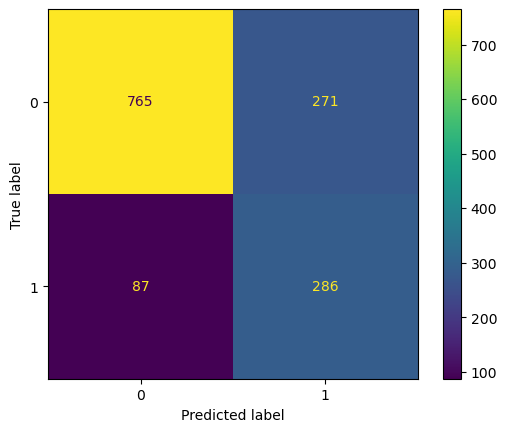

In [97]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

The accuracy went down a bit, so as the precision. In contrast the recall went up significantly. 
Since the precision went down, if we were to use this model, for prediction, we would predict correctly only half the time, so without the SMOTE works better.